In [2]:
from spurs.inference import get_SPURS, parse_pdb, get_SPURS_from_hub
import torch
# load model from huggingface
# ~ 10s
model, cfg = get_SPURS_from_hub()
pdb_name = 'DOCK1_MOUSE'
pdb_path = './data/inference_example/' + pdb_name + '.pdb'
chain = 'A'
pdb = parse_pdb(pdb_path, pdb_name, chain, cfg)
# ~ 1s
model.eval()
with torch.no_grad():
  ddg = model(pdb,return_logist=True)


wt_aa = pdb['seq'][0]
ALPHABET = 'ACDEFGHIKLMNPQRSTVWY'
ddg_wt = ddg[0,ALPHABET.index(wt_aa)]
print(ddg_wt) # should be 0


for mt_aa in ALPHABET:
    if mt_aa != wt_aa:  # 跳过与野生型相同的情况
        ddg_mt = ddg[0, ALPHABET.index(mt_aa)]
        print(f'突变 {wt_aa}→{mt_aa} 的ddg值: {ddg_mt}')

/home/adsb/conda/envs/spurs/lib/python3.9/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


tensor(0., device='cuda:0')
突变 W→A 的ddg值: 0.7213611602783203
突变 W→C 的ddg值: 0.20327606797218323
突变 W→D 的ddg值: 0.8134632706642151
突变 W→E 的ddg值: 0.9050131440162659
突变 W→F 的ddg值: 0.3757290244102478
突变 W→G 的ddg值: 0.6281437277793884
突变 W→H 的ddg值: 0.8278355598449707
突变 W→I 的ddg值: 0.6150547862052917
突变 W→K 的ddg值: 1.0116311311721802
突变 W→L 的ddg值: 0.5730444192886353
突变 W→M 的ddg值: 0.5082613825798035
突变 W→N 的ddg值: 0.9204065799713135
突变 W→P 的ddg值: 0.4634655714035034
突变 W→Q 的ddg值: 0.9241619110107422
突变 W→R 的ddg值: 1.0619001388549805
突变 W→S 的ddg值: 0.6838316321372986
突变 W→T 的ddg值: 0.6201390027999878
突变 W→V 的ddg值: 0.6356649994850159
突变 W→Y 的ddg值: 0.6066355109214783


In [ ]:
from spurs.inference import get_SPURS, parse_pdb, get_SPURS_from_hub
import torch
# load model from huggingface
# ~ 10s
model, cfg = get_SPURS_from_hub()
pdb_name = 'DOCK1_MOUSE'
pdb_path = './data/inference_example/' + pdb_name + '.pdb'
chain = 'A'
pdb = parse_pdb(pdb_path, pdb_name, chain, cfg)
# ~ 1s
model.eval()
with torch.no_grad():
  ddg = model(pdb,return_logist=True)


seq = pdb['seq']
print(seq)
ALPHABET = 'ACDEFGHIKLMNPQRSTVWY'

for s in range(len(seq)):
    wt_aa=seq[s]
    for mt_aa in ALPHABET:
        #if mt_aa != wt_aa:  # 跳过与野生型相同的情况
        ddg_mt = ddg[0, ALPHABET.index(mt_aa)]
        print(f'突变 {wt_aa}→{mt_aa} 的ddg值: {ddg_mt}')

WVPTKREEKYGVAFYNYDARGADELSLQIGDTVHILETYEGWYRGYTLRKKSKKGIFPASYIHLKE


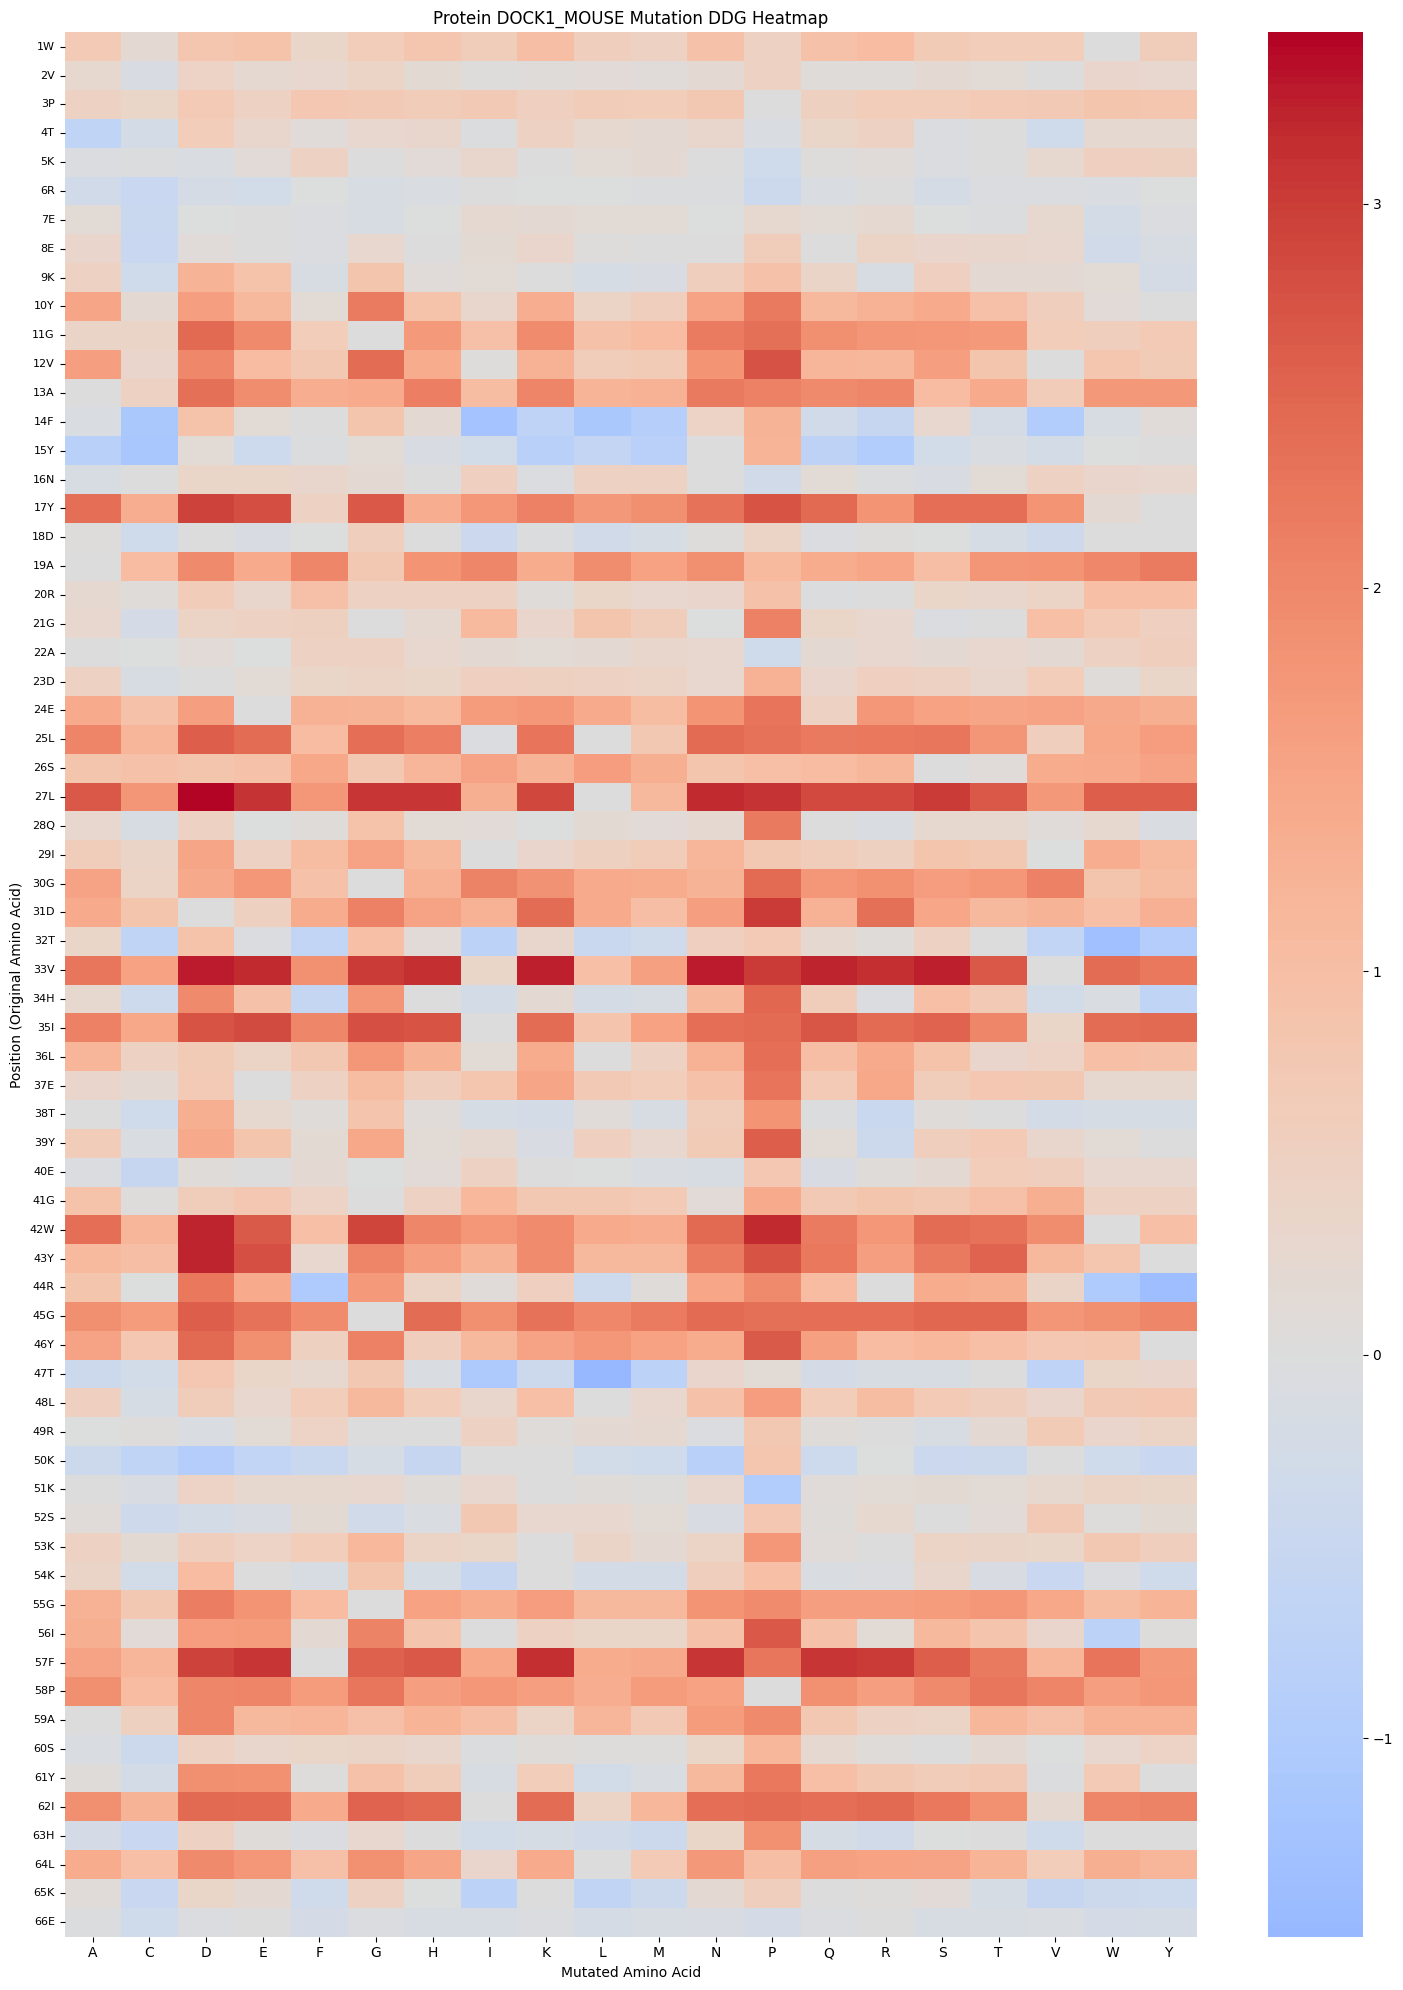

In [26]:
from spurs.inference import get_SPURS, parse_pdb, get_SPURS_from_hub
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 加载模型
model, cfg = get_SPURS_from_hub()
pdb_name = 'DOCK1_MOUSE'
pdb_path = './data/inference_example/' + pdb_name + '.pdb'
chain = 'A'
pdb = parse_pdb(pdb_path, pdb_name, chain, cfg)

# 获取ddg值
model.eval()
with torch.no_grad():
    ddg = model(pdb, return_logist=True)

# 获取序列和氨基酸字母表
seq = pdb['seq']
print(seq)
ALPHABET = 'ACDEFGHIKLMNPQRSTVWY'

# 创建存储所有ddg值的矩阵
ddg_matrix = np.zeros((len(seq), len(ALPHABET)))

# 填充矩阵
for s in range(len(seq)):
    wt_aa = seq[s]
    for mt_aa in ALPHABET:
        ddg_value = ddg[s, ALPHABET.index(mt_aa)].item()  # 注意这里改为s而不是0
        ddg_matrix[s, ALPHABET.index(mt_aa)] = ddg_value

# 创建DataFrame以便更好地可视化
df = pd.DataFrame(ddg_matrix, 
                 index=[f"{i+1}{aa}" for i, aa in enumerate(seq)],  # 位置+原始氨基酸
                 columns=list(ALPHABET))

# 创建热图
plt.figure(figsize=(15, 20))
sns.heatmap(df, 
            cmap='coolwarm', 
            center=0, 
            annot=False, 
            fmt=".2f",
            yticklabels=True) # 强制显示所有 Y 轴标签

plt.title(f'Protein {pdb_name} Mutation DDG Heatmap')
plt.xlabel('Mutated Amino Acid')
plt.ylabel('Position (Original Amino Acid)')

# 优化：如果标签还是太挤，可以减小字体
plt.yticks(fontsize=8) 

plt.tight_layout()

plt.savefig(f'{pdb_name}_ddg_heatmap.png', dpi=300)
plt.savefig('ddg_heatmap.pdf', bbox_inches='tight') 
plt.show()

In [27]:
df.to_csv(f'{pdb_name}_ddg_results.csv', index=True)

print(f"数据已成功导出至：{pdb_name}_ddg_results.csv")

数据已成功导出至：DOCK1_MOUSE_ddg_results.csv
